# Weight predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('height_weight.csv')

### Data pre-processing

Some pre-processing is required. First, let's rename some of the columns to make them easier to type and more readable:

In [3]:
df = df.rename({"Index": "index", "Height(Inches)":"height", "Weight(Pounds)": "weight"}, axis="columns")

### Outlier removal

Let's remove some extreme outliers

In [ ]:
df = df.drop(columns=["index"])

df[(df['height'] < 62) & (df['weight'] > 102)]
df = df.drop(index=[5641, 6941, 9876, 12031, 13971, 20608], axis=0)

In [16]:
df[(df['height'] > 72) & (df['weight'] > 165)]
df = df.drop(axis=0, index=[367, 4343, 17079, 20308])

<Axes: xlabel='height', ylabel='weight'>

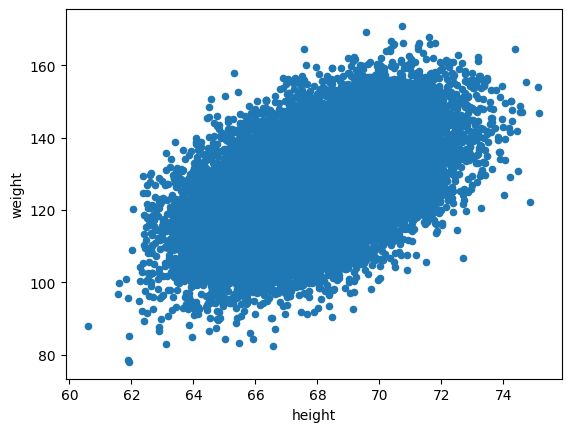

In [ ]:
df.plot.scatter(x="height", y="weight")

In [49]:
df.corr()

,height,weight
height,1.000000,0.501972
weight,0.501972,1.000000


### Model selection

First, let's normalise the data.

In [61]:
normalized_df=(df-df.min())/(df.max()-df.min())

y = normalized_df['weight']
x = normalized_df.drop(columns=['weight'])

Next, we split the data into train and test. We will be using a test size of 20%

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Linear regression model

Let's try out a linear regression model first.

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_train_mse = mean_squared_error(Y_train, train_pred)
lr_train_mae = mean_absolute_error(Y_train, train_pred)
lr_train_r2 = r2_score(Y_train, train_pred)

lr_test_mse = mean_squared_error(Y_test, test_pred)
lr_test_mae = mean_absolute_error(Y_test, test_pred)
lr_test_r2 = r2_score(Y_test, test_pred)

In [67]:
lr_test_mae

np.float64(0.0859696269247462)

In [68]:
lr_test_mse

np.float64(0.011695024540068997)

In [69]:
lr_test_r2

0.2568825745089415

### Random Forest

Let's try a random forest model as well.

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [77]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [78]:
rf_train_mse = mean_squared_error(Y_train, rf_train_pred)
rf_train_mae = mean_absolute_error(Y_train, rf_train_pred)
rf_train_r2 = r2_score(Y_train, rf_train_pred)

rf_test_mse = mean_squared_error(Y_test, rf_test_pred)
rf_test_mae = mean_absolute_error(Y_test, rf_test_pred)
rf_test_r2 = r2_score(Y_test, rf_test_pred)

In [79]:
rf_test_mse

np.float64(0.01710972748248711)

In [80]:
rf_test_mae

np.float64(0.10430416960884846)

In [81]:
rf_test_r2

-0.08717485748554243